<h1><b> PHASE 1 -  DATA GATHERING AND EXPLORATION</b></h1>

<h4><b> Project Background </b></h4>
<hr/>
<p>Chronic diseases represent a growing global health challenge that demands innovative solutions. These long-term health conditions, such as heart disease, diabetes, cancer, and respiratory disorders, have become leading causes of morbidity and mortality worldwide. The burden of chronic diseases not only affects individuals and their families but also places significant strain on healthcare systems and economies.

Traditionally, healthcare has been reactive, with interventions occurring after the onset of symptoms or disease complications. However, there is a paradigm shift towards proactive and preventive healthcare. Advances in data collection, technology, and machine learning present an unprecedented opportunity to predict chronic diseases before they manifest clinically. Early detection allows for timely interventions, personalized treatment plans, and improved health outcomes.</p>

<h4><b> Problem Statement</b></h4>
<hr/>
<p>The problem you aim to solve is predicting the likelihood of a patient developing a chronic disease based on their health data. Chronic diseases are long-lasting conditions that may require ongoing medical attention and can significantly impact a person's quality of life. Early prediction of chronic diseases can lead to better preventive and therapeutic strategies, improving overall healthcare outcomes.</p>

<h4><b>Final Objective</b></h4>
<hr/>
<p>The final objective of your machine learning project is to develop a predictive model that can effectively identify individuals at risk of developing a chronic disease based on their health data</p>

<br/>
<h5><b>Currently, I will work with three Chronic Diseases</b></h5>
<ul>
    <li>Heart Disease</li>
    <li>Stroke Disease</li>
    <li>Lung Cancer</li>
</ul>

<br/>
<br/>
<em>Starting with Heart Disease...</em>

In [33]:
#import necessary libraries for exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#Load dataset
heart_data = pd.read_csv('heart.csv')
heart_df = heart_data.copy()

In [35]:
heart_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [36]:
#variable definition

var_data = {
    'variable': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
    'definition': [
        'The age of the patient.',
        'The gender of the patient (0 for female, 1 for male).',
        'Chest pain type (categorical variable).',
        'Resting blood pressure.',
        'Serum cholesterol level.',
        'Fasting blood sugar level (1 if greater than 120 mg/dL; 0 otherwise).',
        'Resting electrocardiographic results (categorical variable).',
        'Maximum heart rate achieved during exercise.',
        'Exercise-induced angina (1 if yes; 0 otherwise).',
        'ST depression induced by exercise relative to rest.',
        'The slope of the peak exercise ST segment (categorical variable).',
        'Number of major vessels colored by fluoroscopy.',
        'Thalassemia (categorical variable).',
        'The target variable indicating the presence of heart disease (1 if present; 0 otherwise).'
    ]
}


var_definition = pd.DataFrame(var_data)


display(var_definition)


variable                                         definition
0        age                            The age of the patient.
1        sex  The gender of the patient (0 for female, 1 for...
2         cp            Chest pain type (categorical variable).
3   trestbps                            Resting blood pressure.
4       chol                           Serum cholesterol level.
5        fbs  Fasting blood sugar level (1 if greater than 1...
6    restecg  Resting electrocardiographic results (categori...
7    thalach       Maximum heart rate achieved during exercise.
8      exang   Exercise-induced angina (1 if yes; 0 otherwise).
9    oldpeak  ST depression induced by exercise relative to ...
10     slope  The slope of the peak exercise ST segment (cat...
11        ca    Number of major vessels colored by fluoroscopy.
12      thal                Thalassemia (categorical variable).
13    target  The target variable indicating the presence of...

In [37]:
# Rename the columns to make it understable
heart_df.rename(columns={
    'age': 'Age',
    'sex': 'Gender', 
    'cp': 'ChestPainType',  
    'trestbps': 'RestingBP',  
    'chol': 'Cholesterol', 
    'fbs': 'FastingBloodSugar', 
    'restecg': 'RestECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'STSegmentSlope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)

# Check the updated column names
print(heart_df.columns)


Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBloodSugar', 'RestECG', 'MaxHeartRate', 'ExerciseInducedAngina',
       'STDepression', 'STSegmentSlope', 'NumMajorVessels', 'Thalassemia',
       'HeartDisease'],
      dtype='object')


In [38]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1025 non-null   int64  
 1   Gender                 1025 non-null   int64  
 2   ChestPainType          1025 non-null   int64  
 3   RestingBP              1025 non-null   int64  
 4   Cholesterol            1025 non-null   int64  
 5   FastingBloodSugar      1025 non-null   int64  
 6   RestECG                1025 non-null   int64  
 7   MaxHeartRate           1025 non-null   int64  
 8   ExerciseInducedAngina  1025 non-null   int64  
 9   STDepression           1025 non-null   float64
 10  STSegmentSlope         1025 non-null   int64  
 11  NumMajorVessels        1025 non-null   int64  
 12  Thalassemia            1025 non-null   int64  
 13  HeartDisease           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<em> As we can see above the data is cleaned in terms of nan values... let's use isnull() to see further</em>

In [39]:
heart_df.isnull().sum()

Age                      0
Gender                   0
ChestPainType            0
RestingBP                0
Cholesterol              0
FastingBloodSugar        0
RestECG                  0
MaxHeartRate             0
ExerciseInducedAngina    0
STDepression             0
STSegmentSlope           0
NumMajorVessels          0
Thalassemia              0
HeartDisease             0
dtype: int64

In [40]:
#statistics for numerical columns
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

<em> It seems as though the categorical variables has been encoded already :) </em>
<p>Categorical variables are :
    <ul>
        <li>sex</li>
        <li>cp</li>
        <li>fbs</li>
        <li>restecg</li>
        <li>exang</li>
        <li>slope</li>
        <li>ca</li>
        <li>thal</li>
        <li>target</li>
    </ul>
</p>

In [41]:
heart_df.select_dtypes(include='number').columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBloodSugar', 'RestECG', 'MaxHeartRate', 'ExerciseInducedAngina',
       'STDepression', 'STSegmentSlope', 'NumMajorVessels', 'Thalassemia',
       'HeartDisease'],
      dtype='object')

In [42]:
heart_df.head()

Age  Gender  ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   52       1              0        125          212                  0   
1   53       1              0        140          203                  1   
2   70       1              0        145          174                  0   
3   61       1              0        148          203                  0   
4   62       0              0        138          294                  1   

   RestECG  MaxHeartRate  ExerciseInducedAngina  STDepression  STSegmentSlope  \
0        1           168                      0           1.0               2   
1        0           155                      1           3.1               0   
2        1           125                      1           2.6               0   
3        1           161                      0           0.0               2   
4        1           106                      0           1.9               1   

   NumMajorVessels  Thalassemia  HeartDisease  
0                2            3             0  
1                0            3             0  
2                0            3             0  
3                1            3             0  
4                3            2             0

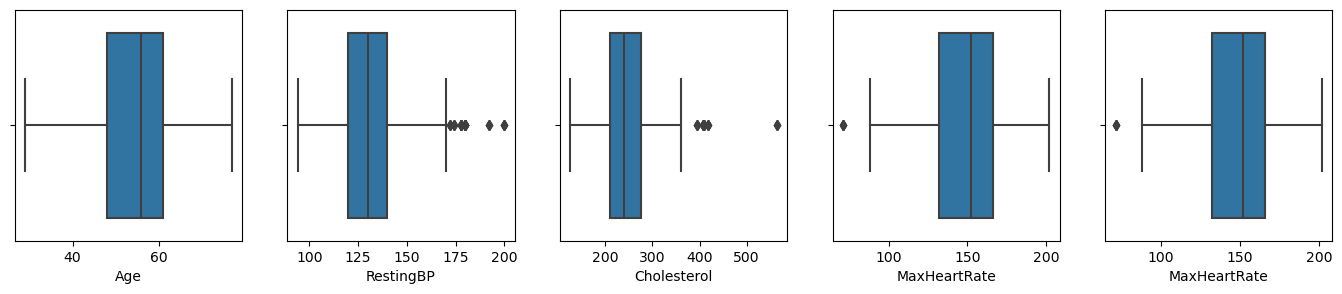

In [43]:
#outlier check

def OutlierCheck(dataframe,a,b,c,d,e):
    plt.figure(figsize=(17,3))
    
    plt.subplot(1,5,1)
    sns.boxplot(x = dataframe[a])
    
    plt.subplot(1,5,2)
    sns.boxplot(x = dataframe[b])
    
    plt.subplot(1,5,3)
    sns.boxplot(x = dataframe[c])
    
    plt.subplot(1,5,4)
    sns.boxplot(x = dataframe[d])
    
    plt.subplot(1,5,5)
    sns.boxplot(x = dataframe[d])
    
OutlierCheck(heart_df, 'Age', 'RestingBP', 'Cholesterol', 'MaxHeartRate', 'STDepression')

<em> There is little to none outlier.......... </em>

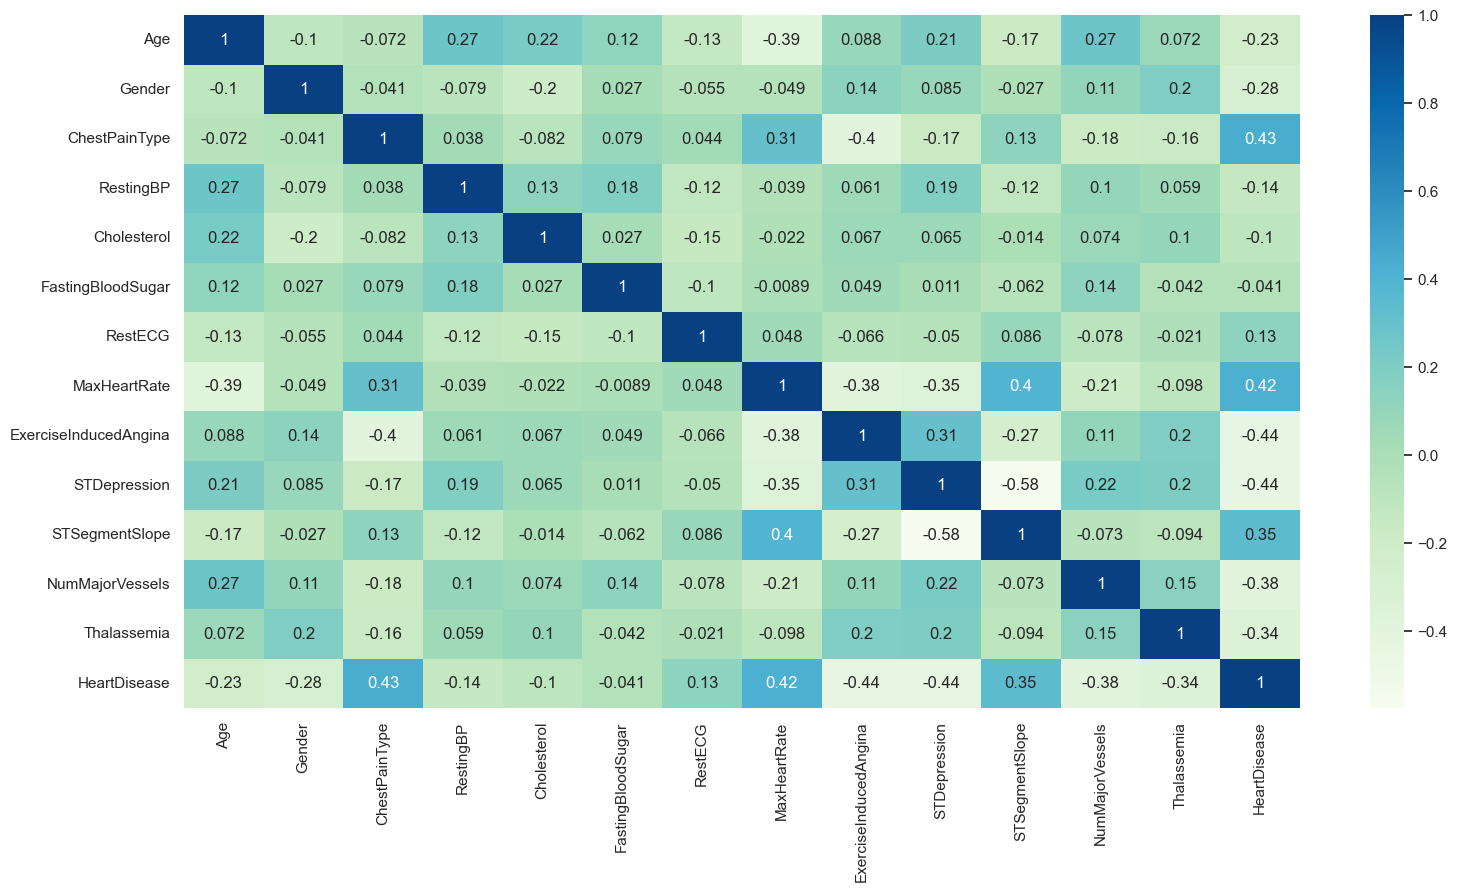

In [176]:
plt.figure(figsize = (18,9))
sns.heatmap(heart_df.corr(), cmap='GnBu', annot=True)
plt.show()

In [44]:
import ydata_profiling
heart_df.profile_report(title = "Heart Disease Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<em> After looking through the data, I figure there exist duplicate rows, let's look into it</em>

In [45]:
#removing duplicates 

heart_no_duplicate = heart_df.drop_duplicates()

heart_no_duplicate.reset_index(drop=True, inplace=True)


In [48]:
#shape of dataset without duplicate
heart_no_duplicate.shape

(302, 14)

<em> After removing the duplicates, the dataset reduced dramastically. So i took a look again, since it is a health data, it is possible that personnels may have the same data. Moreover after looking at some trade-offs (like having poor model performance, underfitting etc), it is best wise to keep the duplicates </em>

<em> After a little research and with some domain knowledge, considering dealing with the heart, all columns with be required </em>

In [50]:
#select dependent and independent variables
x = heart_df.drop('HeartDisease', axis = 1)
y = heart_df.HeartDisease

In [51]:
#x shape
x.shape

(1025, 13)

In [53]:
#y shape
y.shape

(1025,)

In [54]:
#split to train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=47)

In [55]:
#scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_xtrain = scaler.fit_transform(xtrain)
new_xtest = scaler.transform(xtest)

<em> Done........... </em>

<br/>
<br/>
<br/>
<em> Now let's explore the Stroke Disease <em>

In [116]:
#load dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df = stroke_data.copy()

In [117]:
stroke_df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [118]:
#remove id
stroke_df.drop('id', axis =1 , inplace = True)

In [119]:
#explain variables

stroke_var_data = {
    'Variable': ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
    'Definition': [
        'Gender of the patient.',
        'Age of the patient.',
        'Whether the patient has hypertension (1 for Yes, 0 for No).',
        'Whether the patient has heart disease (1 for Yes, 0 for No).',
        'Whether the patient is ever married (Yes or No).',
        'Type of work the patient is engaged in (e.g., Urban, Rural).',
        'Type of residence (e.g., Urban or Rural).',
        'Average glucose level in the patient\'s blood.',
        'Body Mass Index (BMI) of the patient.',
        'Smoking status of the patient (e.g., "formerly smoked", "never smoked", etc.).',
        'The target variable indicating the presence of a stroke (1 for Yes, 0 for No).'
    ]
}


stroke_var_definition = pd.DataFrame(stroke_var_data)

display(stroke_var_definition)


Variable                                         Definition
0              gender                             Gender of the patient.
1                 age                                Age of the patient.
2        hypertension  Whether the patient has hypertension (1 for Ye...
3       heart_disease  Whether the patient has heart disease (1 for Y...
4        ever_married   Whether the patient is ever married (Yes or No).
5           work_type  Type of work the patient is engaged in (e.g., ...
6      Residence_type          Type of residence (e.g., Urban or Rural).
7   avg_glucose_level      Average glucose level in the patient's blood.
8                 bmi              Body Mass Index (BMI) of the patient.
9      smoking_status  Smoking status of the patient (e.g., "formerly...
10             stroke  The target variable indicating the presence of...

In [120]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [121]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<em> From the findings above, the dataset contains 5110 rows and only bmi has missing rows(201)</em>

In [122]:
stroke_df = stroke_df[~(stroke_df['bmi'].isna() & (stroke_df['stroke'] == 0))]
stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)

In [123]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<em> What was done here is that since, there are 201 missing value in bmi, considering its importance, it is advisable to drop it, so we filter into data that has class 0 since it is the upper class and then the rest(class 1), we fillna into it</em>

In [124]:
#statistics of numerical variables
stroke_df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4949.000000   4949.000000    4949.000000        4949.000000   
mean     43.066971      0.092342       0.050515         105.439725   
std      22.611096      0.289537       0.219028          44.574415   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.040000   
50%      45.000000      0.000000       0.000000          91.680000   
75%      61.000000      0.000000       0.000000         113.650000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4949.000000  4949.000000  
mean     28.886826     0.050313  
std       7.822578     0.218613  
min      10.300000     0.000000  
25%      23.600000     0.000000  
50%      28.100000     0.000000  
75%      33.000000     0.000000  
max      97.600000     1.000000

<br/>
<hr/>
<em> Its time to label encode our categorical variables </em>

In [125]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in stroke_df.columns:
    if stroke_df[i].dtype == 'object':
        stroke_df[i] = lb.fit_transform(stroke_df[i])


In [126]:
stroke_df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

<em> Standard scale numerical columns</em>

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['age','avg_glucose_level', 'bmi']
stroke_df[numerical_columns] = scaler.fit_transform(stroke_df[numerical_columns])


display(stroke_df)


gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  1.058571             0              1             1          2   
1          0  0.793188             0              0             1          3   
2          1  1.633568             0              1             1          2   
3          0  0.262421             0              0             1          2   
4          0  1.589337             1              0             1          3   
...      ...       ...           ...            ...           ...        ...   
5104       0 -1.329878             0              0             0          4   
5106       0  1.677798             0              0             1          3   
5107       0 -0.356807             0              0             1          3   
5108       1  0.350882             0              0             1          2   
5109       0  0.041268             0              0             1          0   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0                  1           2.765325  0.986114               1       1  
1                  0           2.171202 -0.100594               2       1  
2                  0           0.010776  0.461937               2       1  
3                  1           1.476114  0.704848               3       1  
4                  0           1.540956 -0.624771               2       1  
...              ...                ...       ...             ...     ...  
5104               0          -0.052944 -1.315150               0       0  
5106               1           0.443355  1.420797               2       0  
5107               0          -0.503697  0.219026               2       0  
5108               0           1.365277 -0.420214               1       0  
5109               1          -0.452317 -0.343505               0       0  

[4949 rows x 11 columns]

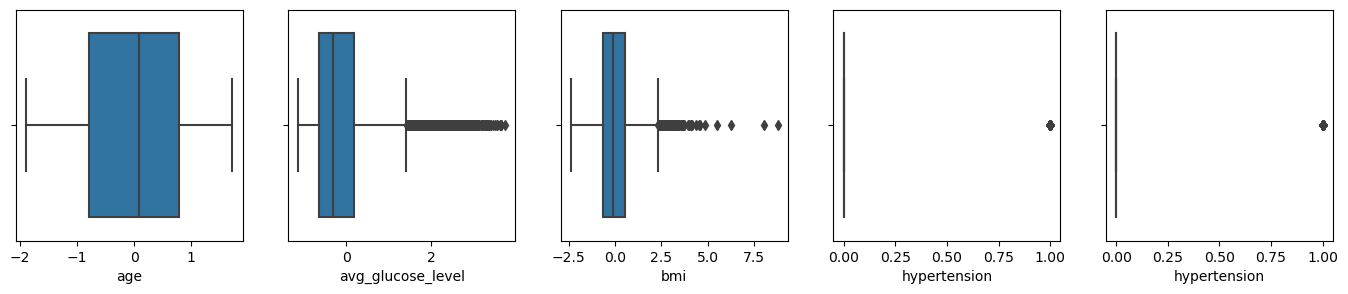

In [128]:
#check for outliers
OutlierCheck(stroke_df, 'age','avg_glucose_level','bmi','hypertension','heart_disease')

<em> As we can the the 2nd and 3rd columns has numerous outliers, the last two columns weren't need since they are categorical but since i defined 5 variables earlier in my function, i had to randomly add those last two</em>

In [129]:
#removr outliers

def outlierRemoval(dataframe):
    for i in dataframe.columns:
      if i in dataframe.select_dtypes(include = 'number').columns:
          Q1 = dataframe[i].describe()[4]  # Index 3 for Q1 (25th percentile)
          Q3 = dataframe[i].describe()[6]  # Index 7 for Q3 (75th percentile)
          IQR = Q3 - Q1
          lowerIQR = Q1 - 1.5 * IQR
          upperIQR = Q3 + 1.5 * IQR
          dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

stroke_df['avg_glucose_level'] = outlierRemoval(stroke_df[['avg_glucose_level']])
stroke_df['bmi'] = outlierRemoval(stroke_df[['bmi']])

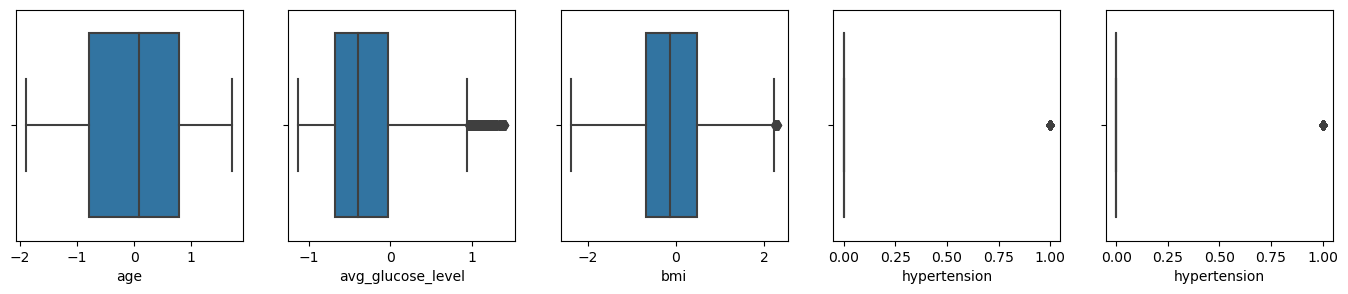

In [130]:
#check again for outliers
OutlierCheck(stroke_df, 'age','avg_glucose_level','bmi','hypertension','heart_disease')

In [131]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level    578
bmi                  117
smoking_status         0
stroke                 0
dtype: int64

In [139]:
stroke_df = stroke_df[~(stroke_df['bmi'].isna() & (stroke_df['stroke'] == 0))]
stroke_df = stroke_df[~(stroke_df['avg_glucose_level'].isna() & (stroke_df['avg_glucose_level'] == 0))]
stroke_df.dropna(inplace=True)

In [140]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

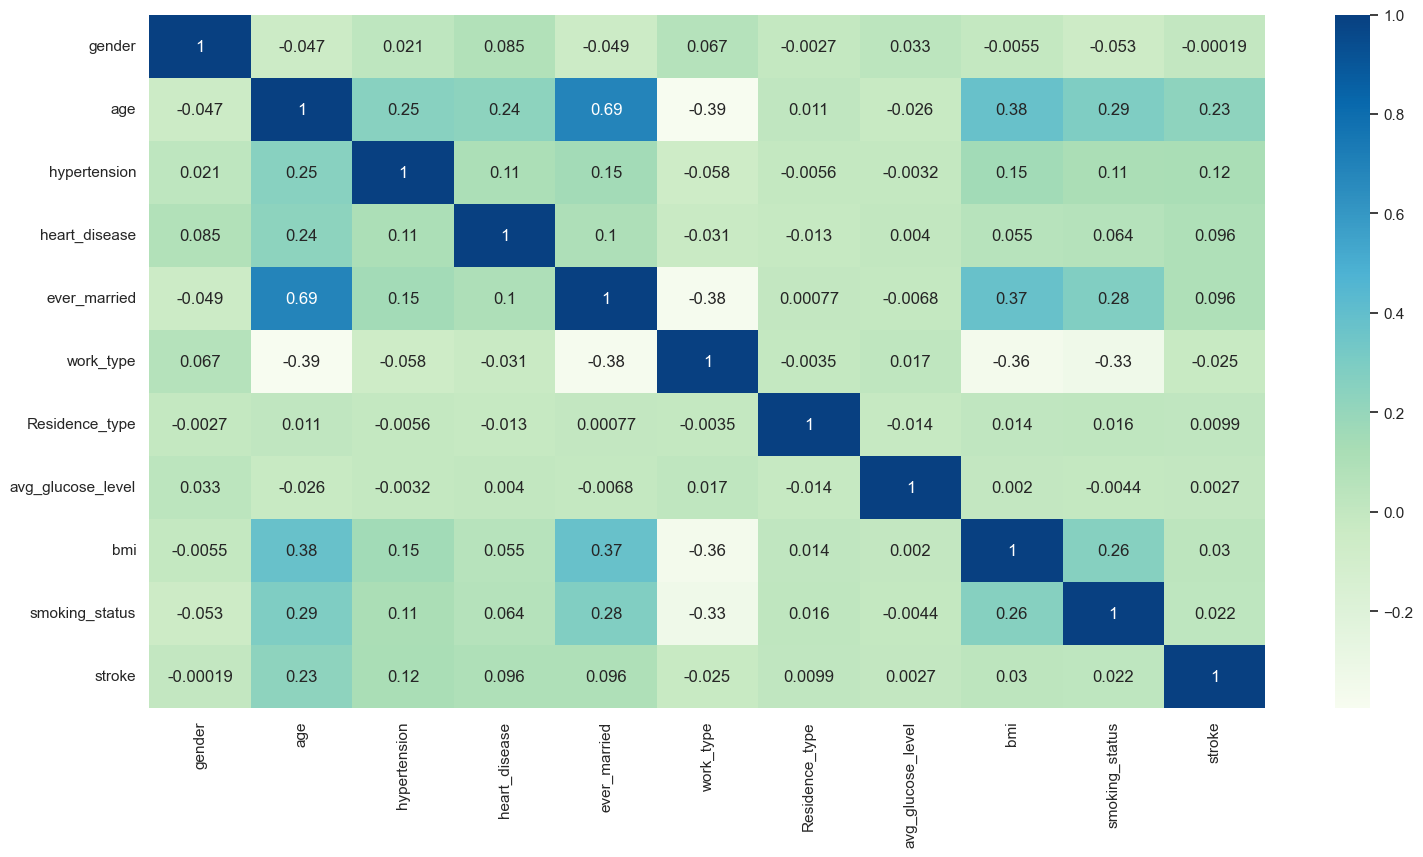

In [175]:
plt.figure(figsize = (18,9))
sns.heatmap(stroke_df.corr(), cmap='GnBu', annot=True)
plt.show()

In [142]:
stroke_df.profile_report(title = "Stroke Disease Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<em> Above we can see there is a high imbalance in the target variable (stroke)</em>

In [141]:
stroke_df['stroke'].value_counts()

0    4120
1     165
Name: stroke, dtype: int64

<em> Feature Selection... </em>

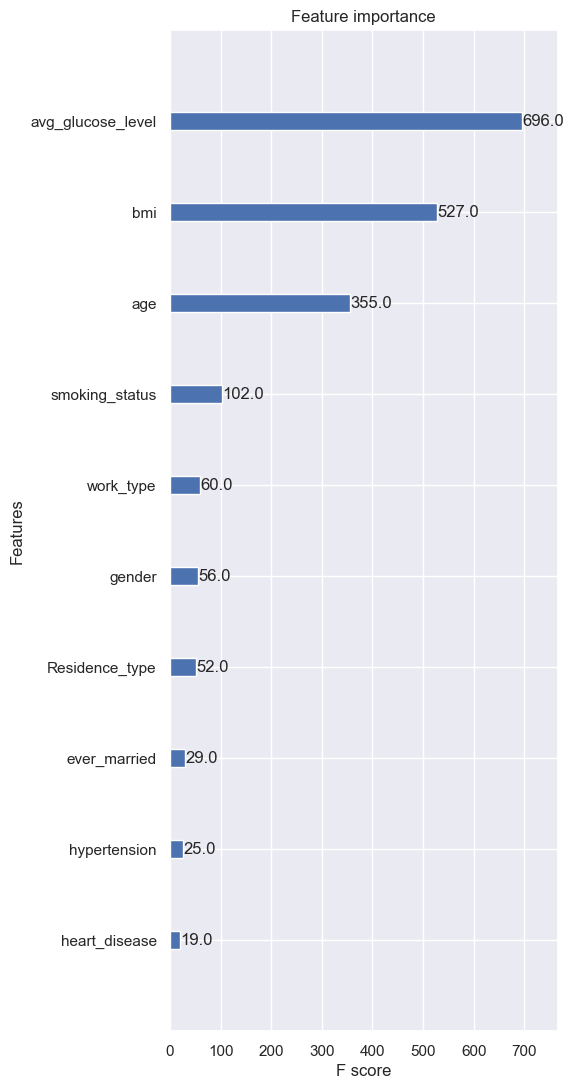

In [151]:
import xgboost as xgb

a = stroke_df.drop('stroke',axis = 1)
b = stroke_df.stroke

xgb_model = xgb.XGBClassifier()
xgb_model.fit(a, b)

plt.rcParams['figure.figsize'] = (5, 13)
# Print feature importance scores
xgb.plot_importance(xgb_model, importance_type= 'weight')
plt.show()

In [152]:
# ANOVA F-value between label/feature


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(a,b)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(a.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

Feature  F_classif_score
1                age       241.695804
2       hypertension        64.792013
3      heart_disease        39.838398
4       ever_married        39.837872
8                bmi         3.925112
5          work_type         2.610674
9     smoking_status         2.136809
6     Residence_type         0.422670
7  avg_glucose_level         0.030404
0             gender         0.000159

<Axes: >

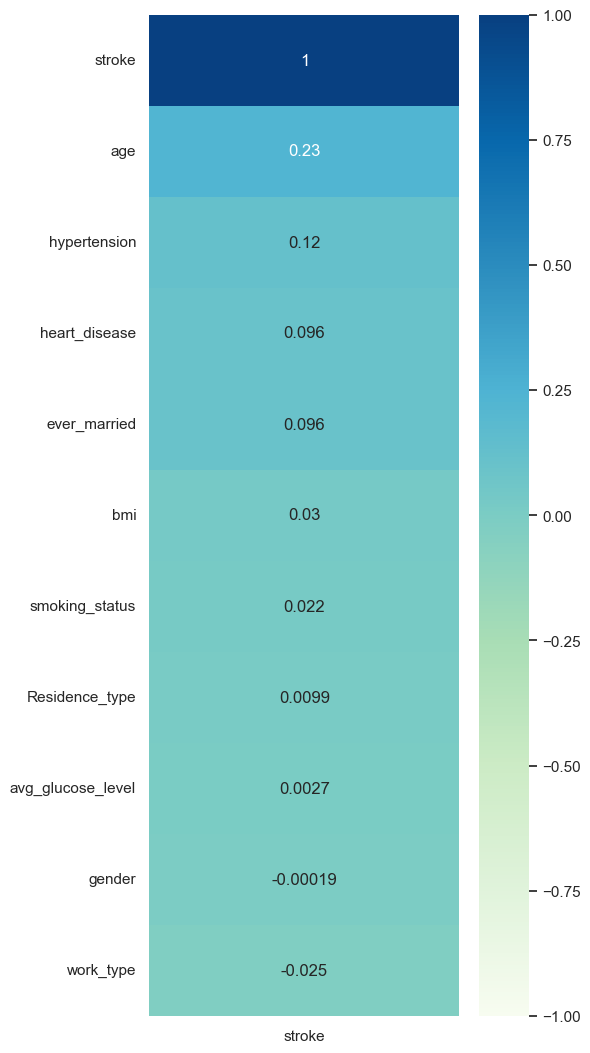

In [197]:
sns.heatmap(stroke_df.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [153]:
stroke_feature = stroke_df[['age','hypertension','heart_disease','bmi','stroke','avg_glucose_level']]

In [154]:
#split into train and test

from sklearn.model_selection import train_test_split
stroke_x = stroke_feature.drop('stroke',axis = 1)
stroke_y = stroke_feature.stroke

stroke_xtrain,stroke_xtest,stroke_ytrain,stroke_ytest = train_test_split(stroke_x, stroke_y, test_size = 0.20, random_state = 42,stratify=stroke_y)

<Axes: xlabel='HeartDisease', ylabel='count'>

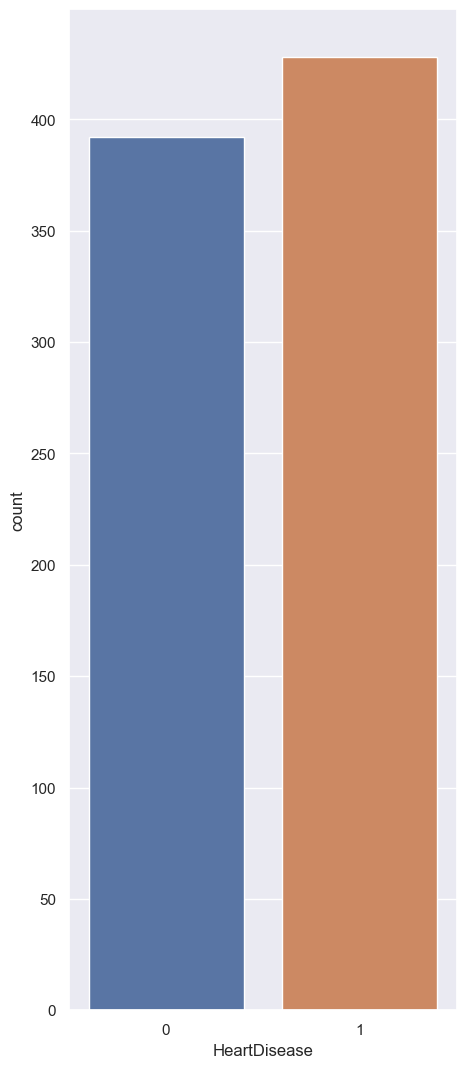

In [155]:
sns.countplot(x = ytrain)

In [156]:
# oversampling the train dataset using ADASYN
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=1)
xtrain_ada, ytrain_ada = ada.fit_resample(stroke_xtrain,stroke_ytrain)

<Axes: xlabel='stroke', ylabel='count'>

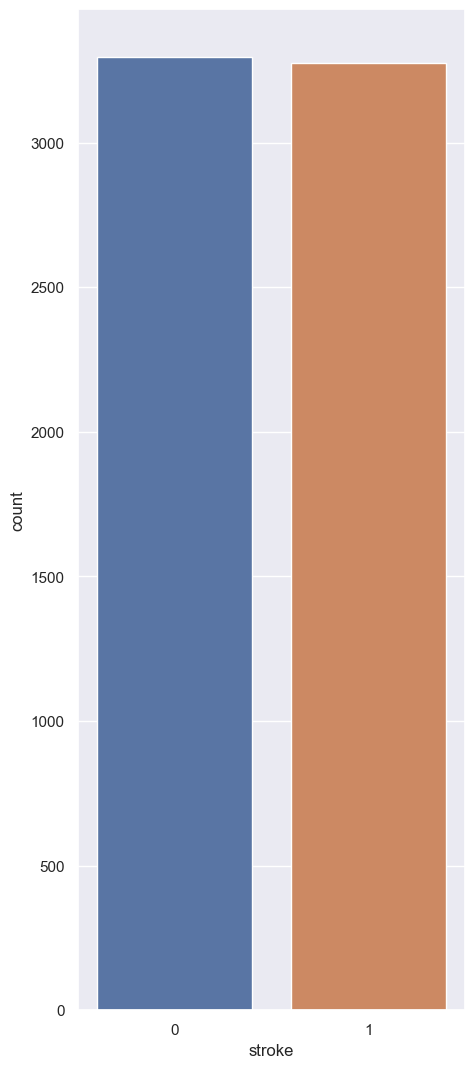

In [157]:
sns.set(style = 'darkgrid')
sns.countplot(x = ytrain_ada)

<em> Done......... </em>

<br/>
<br/>
<hr/>
<em> Lastly, let's work on Lungs Cancer </em>

In [180]:
#load dataset
lung_data = pd.read_csv('cancer patient data sets.csv')
lung_df = lung_data.copy()

In [181]:
pd.set_option('display.max_columns',None)

In [182]:
lung_df.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4        3               2           2                  4        3   
1        2        2               4           2                  3        1   
2        7        2               3           4                  8        8   
3        7        7               7           7                  8        4   
4        7        8               7           7                  9        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High

In [183]:
lung_df.drop(['index', 'Patient Id'], axis =1 , inplace=True)

In [184]:
lung_df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [185]:
#explain variables


variables = [
    'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
    'Occupational Hazards', 'Genetic Risk', 'Chronic Lung Disease',
    'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
    'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
    'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
    'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'
]

definitions = [
    'Patient\'s age (in years)',
    'Patient\'s gender (Male/Female)',
    'Level of air pollution in the environment (e.g., Low, Moderate, High)',
    'The level of alcohol use of the patient',
    'The level of dust allergy of the patient.',
    'The level of occupational hazards of the patient.',
    'The level of genetic risk of the patient.',
    'The level of chronic lung disease of the patient.',
    'The level of balanced diet of the patient.',
    'The level of obesity of the patient.',
    'The level of smoking of the patient.',
    'The level of passive smoker of the patient.',
    'The level of chest pain of the patient.',
    'The level of coughing of blood of the patient.',
    'The level of fatigue of the patient.',
    'The level of weight loss of the patient.',
    'The level of shortness of breath of the patient',
    'The level of wheezing of the patient.',
    'The level of swallowing difficulty of the patient.',
    'The level of swallowing difficulty of the patient.',
    'The level of Frequent colds',
    'The level of Dry cough',
    'The level of Snoring',
    'Lung cancer risk level (e.g., Low, Medium, High)'
]

lung_var = pd.DataFrame({'Variable': variables, 'Definition': definitions})


display(lung_var)


Variable  \
0                        Age   
1                     Gender   
2              Air Pollution   
3                Alcohol use   
4               Dust Allergy   
5       Occupational Hazards   
6               Genetic Risk   
7       Chronic Lung Disease   
8              Balanced Diet   
9                    Obesity   
10                   Smoking   
11            Passive Smoker   
12                Chest Pain   
13         Coughing of Blood   
14                   Fatigue   
15               Weight Loss   
16       Shortness of Breath   
17                  Wheezing   
18     Swallowing Difficulty   
19  Clubbing of Finger Nails   
20             Frequent Cold   
21                 Dry Cough   
22                   Snoring   
23                     Level   

                                           Definition  
0                            Patient's age (in years)  
1                      Patient's gender (Male/Female)  
2   Level of air pollution in the environment (e.g...  
3             The level of alcohol use of the patient  
4           The level of dust allergy of the patient.  
5   The level of occupational hazards of the patient.  
6           The level of genetic risk of the patient.  
7   The level of chronic lung disease of the patient.  
8          The level of balanced diet of the patient.  
9                The level of obesity of the patient.  
10               The level of smoking of the patient.  
11        The level of passive smoker of the patient.  
12            The level of chest pain of the patient.  
13     The level of coughing of blood of the patient.  
14               The level of fatigue of the patient.  
15           The level of weight loss of the patient.  
16    The level of shortness of breath of the patient  
17              The level of wheezing of the patient.  
18  The level of swallowing difficulty of the pati...  
19  The level of swallowing difficulty of the pati...  
20                        The level of Frequent colds  
21                             The level of Dry cough  
22                               The level of Snoring  
23   Lung cancer risk level (e.g., Low, Medium, High)

In [186]:
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [187]:
lung_df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<em> The dataset is clean and is all categorical except age </em>

In [188]:
lung_df.describe()

Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000000              1.000000   
25%                3.000000      2.000000              3.000000   
50%                5.000000      5.000000              4.000000   
75%                7.000000      7.000000              6.000000   
max                8.000000      7.000000              7.000000   

       Balanced Diet      Obesity      Smoking  Passive Smoker   Chest Pain  \
count    1000.000000  1000.000000  1000.000000     1000.000000  1000.000000   
mean        4.491000     4.465000     3.948000        4.195000     4.438000   
std         2.135528     2.124921     2.495902        2.311778     2.280209   
min         1.000000     1.000000     1.000000        1.000000     1.000000   
25%         2.000000     3.000000     2.000000        2.000000     2.000000   
50%         4.000000     4.000000     3.000000        4.000000     4.000000   
75%         7.000000     7.000000     7.000000        7.000000     7.000000   
max         7.000000     7.000000     8.000000        8.000000     9.000000   

       Coughing of Blood      Fatigue  Weight Loss  Shortness of Breath  \
count        1000.000000  1000.000000  1000.000000          1000.000000   
mean            4.859000     3.856000     3.855000             4.240000   
std             2.427965     2.244616     2.206546             2.285087   
min             1.000000     1.000000     1.000000             1.000000   
25%             3.000000     2.000000     2.000000             2.000000   
50%             4.000000     3.000000     3.000000             4.000000   
75%             7.000000     5.000000     6.000000             6.000000   
max             9.000000     9.000000     8.000000             9.000000   

          Wheezing  Swallowing Difficulty  Clubbing of Finger Nails  \
count  1000.000000            1000.000000               1000.000000   
mean      3.777000               3.746000                  3.923000   
std       2.041921               2.270383                  2.388048   
min       1.000000               1.000000                  1.000000   
25%       2.000000               2.000000                  2.000000   
50%       4.000000               4.000000                  4.000000   
75%       5.000000               5.000000                  5.000000   
max       8.000000               8.000000                  9.000000   

       Frequent Cold    Dry Cough      Snoring  
count    1000.000000  1000.000000  1000.000000  
mean        3.536000     3.853000     2.926000  
std         1.832502     2.039007     1.474686  
min         1.000000     1.000000     1.000000  
25%         2.000000     2.000000     2.000000  
50%         3.000000     4.000000     3.000000  
75%         5.000000     6.000000     4.000000  
max         7.000000     7.000000     7.000000

In [189]:
lung_df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [190]:
lung_df['Level'] = lung_df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})


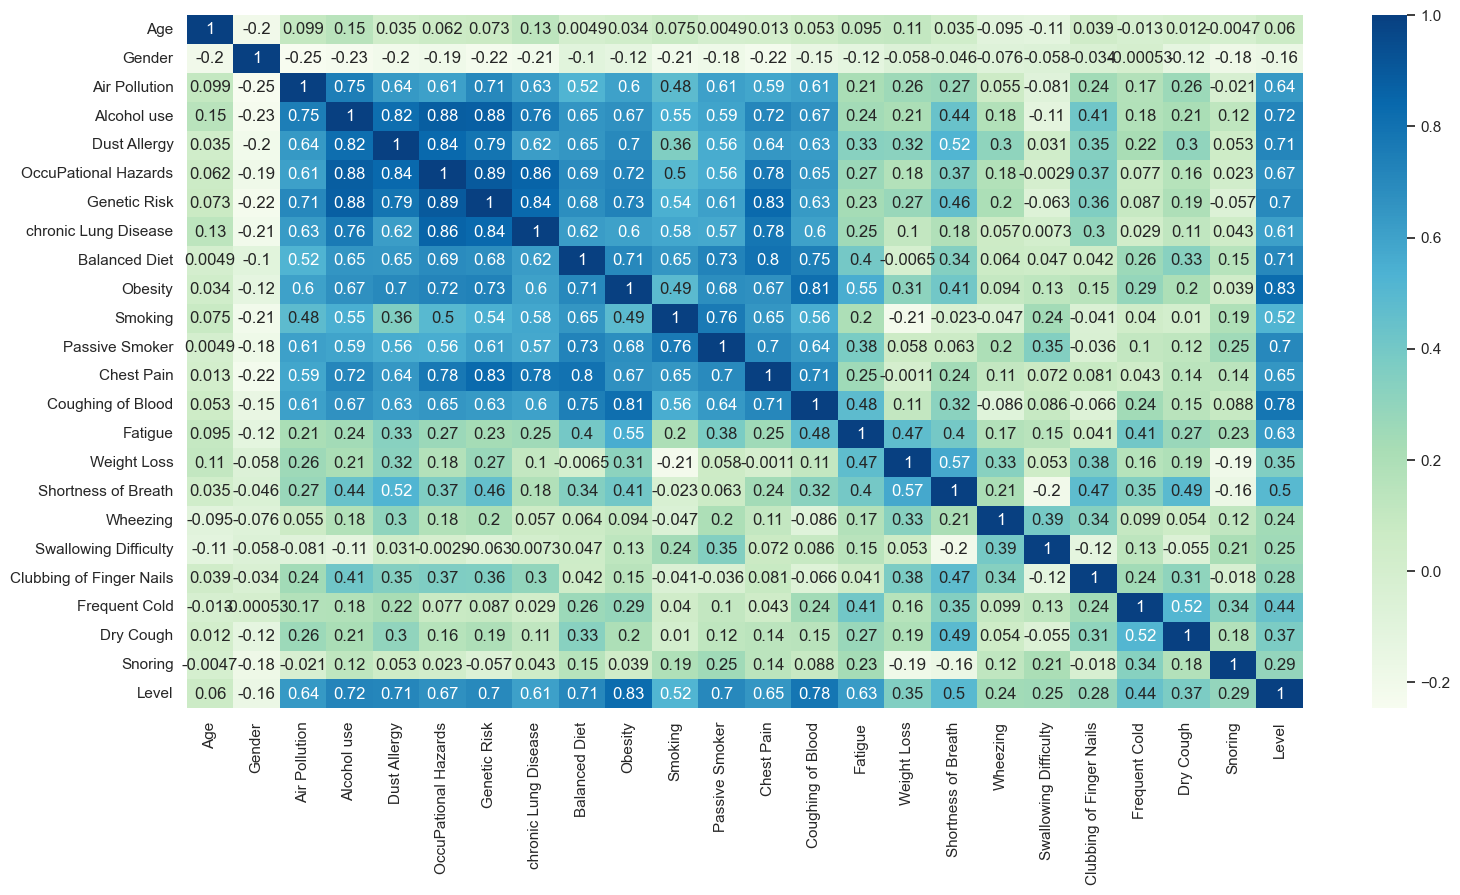

In [191]:
plt.figure(figsize = (18,9))
sns.heatmap(lung_df.corr(), cmap='GnBu', annot=True)
plt.show()

In [200]:
lung_df.profile_report(title = ("Lung Cancer Report"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<em> Feature Selection.... </em>

In [193]:
lung_df.Level

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

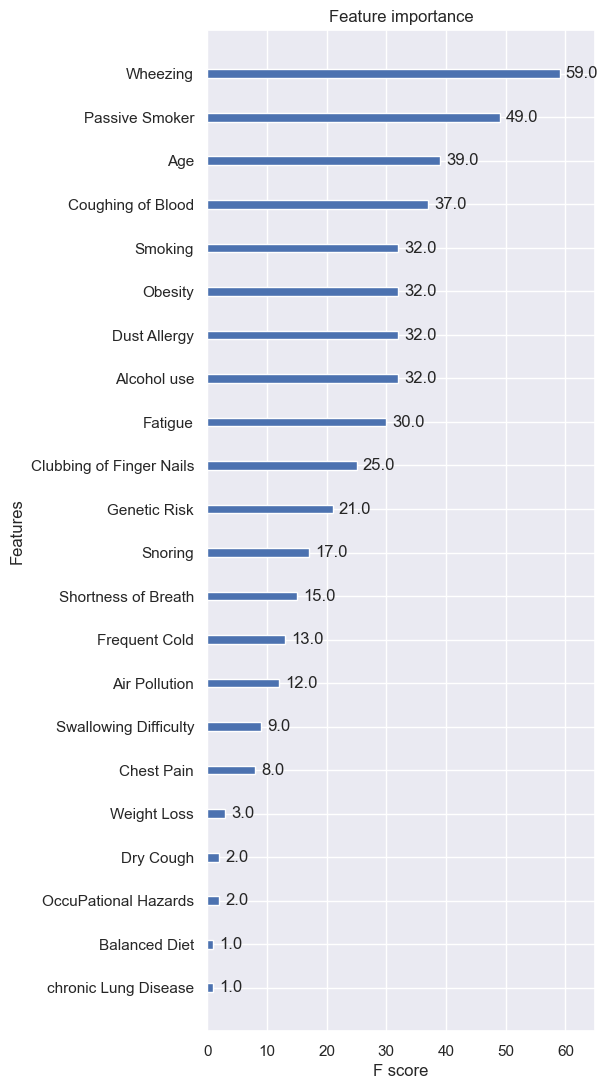

In [194]:
import xgboost as xgb

c = lung_df.drop('Level',axis = 1)
d = lung_df.Level

xgb_mod = xgb.XGBClassifier()
xgb_mod.fit(c, d)

plt.rcParams['figure.figsize'] = (5, 13)
# Print feature importance scores
xgb.plot_importance(xgb_mod, importance_type= 'weight')
plt.show()

In [195]:
# ANOVA F-value between label/feature


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature2 = SelectKBest(score_func = f_classif, k = 'all')
fitting2 = best_feature2.fit(c,d)
scores2 = pd.DataFrame(fitting2.scores_)
columns2 = pd.DataFrame(c.columns)
feat_score2 = pd.concat([columns2, scores2], axis = 1)
feat_score2.columns = ['Feature', 'F_classif_score']
k2 = feat_score2.nlargest(11, 'F_classif_score')

k2.sort_values(by = 'F_classif_score', ascending = False)

Feature  F_classif_score
9                Obesity      1190.536673
13     Coughing of Blood      1037.558618
11        Passive Smoker       722.189101
8          Balanced Diet       689.937861
4           Dust Allergy       558.635395
3            Alcohol use       540.243082
6           Genetic Risk       488.980780
2          Air Pollution       466.785590
5   OccuPational Hazards       413.331581
12            Chest Pain       404.801066
10               Smoking       369.483017

<Axes: >

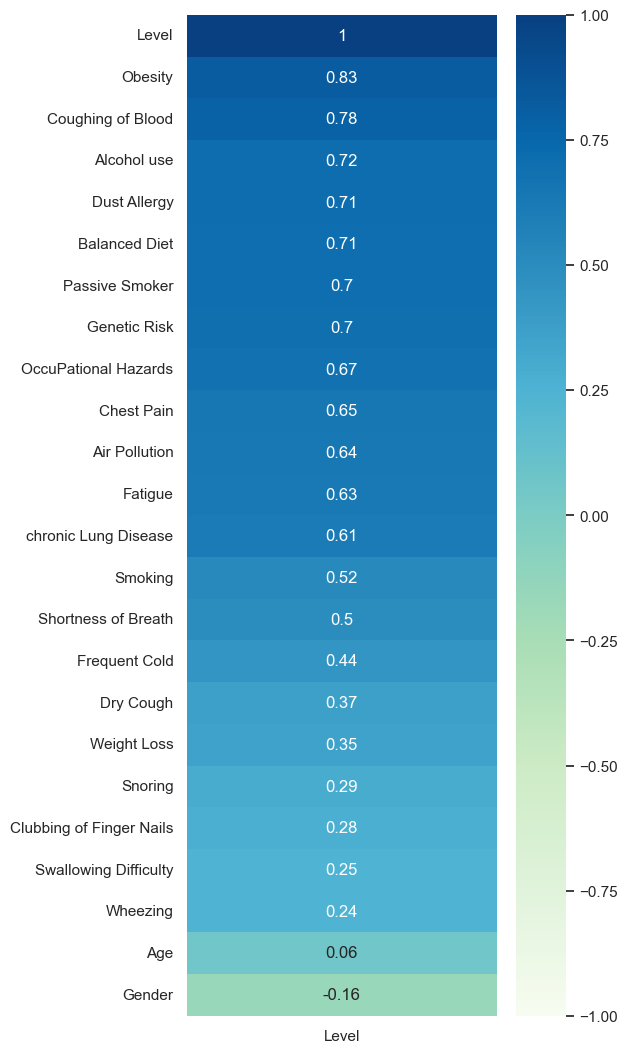

In [196]:
sns.heatmap(lung_df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [198]:
lung_feature = lung_df[['Obesity','Coughing of Blood','Passive Smoker','Alcohol use','Dust Allergy','Genetic Risk','Level']]

In [199]:
lung_x = lung_feature.drop('Level', axis = 1)
lung_y = lung_feature.Level

lung_xtrain,lung_xtest,lung_ytrain,lung_ytest = train_test_split(lung_x, lung_y, test_size=0.20, random_state=99)